# 1.Setup

A configuração de setup é o processo de preparar e organizar o ambiente para uso. Envolvendo a instalação de bibliotecas e configuração de outros ajustes necessários. O objetivo é criar um ambiente funcional para executar tarefas específicas.

## 1.1.Conexão com drive

Para realizar a análise, padronização e manipulação dos dados é necessário selecionar a base de dados desejada. Neste documento a importação da mesma será feita através do Google Drive e o arquivo está em formato excel (csv).

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import pandas
import sklearn

In [3]:
cnpjs_2 = pd.read_csv('/content/drive/MyDrive/T4M8G2/DADOS/CNPJ/cnpjs_2.csv', delimiter=';')

<ipython-input-3-aaa37295fb39>:1: DtypeWarning: Columns (10,24,25,29,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  cnpjs_2 = pd.read_csv('/content/drive/MyDrive/T4M8G2/DADOS/CNPJ/cnpjs_2.csv', delimiter=';')


In [4]:
cnpjs_2

,data,cnpj,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,...,cep,ddd_1,telefone_1,ddd_2,telefone_2,ddd_fax,fax,email,situacao_especial,data_situacao_especial
0,2022-08-13,22114251000130,22114251,1,30,1,SALGATERIA NOVA BRASILIA,2,2021-03-19,0,...,3583040.0,11.0,34125953,NaN,NaN,NaN,NaN,lopes.fae@uol.com.br,NaN,NaN
1,2022-08-13,13771040000189,13771040,1,89,1,NaN,2,2011-06-08,0,...,8020000.0,11.0,25586794,NaN,NaN,NaN,NaN,cida.almeida@qservice.com.br,NaN,NaN
2,2022-08-13,60359627000165,60359627,1,65,1,NaN,2,2005-11-03,0,...,8020320.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-13,36931709000158,36931709,1,58,1,LANCHONETE SIMPLES DELICIA,2,2020-04-14,0,...,8031000.0,11.0,25148867,NaN,NaN,NaN,NaN,jefferson.c.teixeira1995@gmail.com,NaN,NaN
4,2022-08-13,41721828000116,41721828,1,16,1,MATHILDA BURGER E BROWNIE,2,2021-04-27,0,...,8060090.0,11.0,75816201,NaN,NaN,NaN,NaN,ederamarques@gmail.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157934,2022-01-08,15784413000181,15784413,1,81,1,PAO DE QUEIJO DO SEU CORNELIO,2,2012-06-26,0,...,64049240.0,86.0,99393461.0,NaN,NaN,NaN,NaN,euler_almeida@hotmail.com,NaN,NaN
6157935,2022-01-08,12261528000101,12261528,1,1,1,MR. PETELLO CAFE,2,2010-07-16,0,...,64049532.0,86.0,32342888.0,NaN,NaN,86.0,32342888.0,marceloasoares@ibest.com.br,NaN,NaN
6157936,2022-01-08,41440431000156,41440431,1,56,1,DELI DOG,2,2021-04-02,0,...,64055510.0,86.0,95434111.0,NaN,NaN,NaN,NaN,laviniaoliiveiraa@gmail.com,NaN,NaN
6157937,2022-01-08,42103975000195,42103975,1,95,1,LANCHONETE SABINO,2,2021-05-26,0,...,64110000.0,86.0,95921974.0,NaN,NaN,NaN,NaN,sabrynakelly2@gmail.com,NaN,NaN


In [5]:
cnpjs_2.dtypes

data                            object
cnpj                             int64
cnpj_basico                      int64
cnpj_ordem                       int64
cnpj_dv                          int64
identificador_matriz_filial      int64
nome_fantasia                   object
situacao_cadastral               int64
data_situacao_cadastral         object
motivo_situacao_cadastral        int64
nome_cidade_exterior            object
id_pais                        float64
data_inicio_atividade           object
cnae_fiscal_principal            int64
cnae_fiscal_secundaria          object
sigla_uf                        object
id_municipio                   float64
id_municipio_rf                  int64
tipo_logradouro                 object
logradouro                      object
numero                          object
complemento                     object
bairro                          object
cep                            float64
ddd_1                           object
telefone_1               

In [6]:
quantidadeLinhas = cnpjs_2.shape[0]
print("A tabela possui", quantidadeLinhas, "linhas.")

A tabela possui 6157939 linhas.


In [7]:
cnpjs_2.describe()

,cnpj,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,situacao_cadastral,motivo_situacao_cadastral,id_pais,cnae_fiscal_principal,id_municipio,id_municipio_rf,cep,ddd_2,telefone_2,ddd_fax
count,6.157939e+06,6.157939e+06,6.157939e+06,6.157939e+06,6.157939e+06,6157939.0,6157939.0,37399.000000,6157939.0,6.157897e+06,6.157939e+06,6.157897e+06,389108.000000,3.883740e+05,391474.000000
mean,3.196556e+13,3.196556e+07,8.678827e+00,4.507164e+01,1.035628e+00,2.0,0.0,105.528196,5611203.0,3.465258e+06,5.803850e+03,4.486521e+07,33.874940,4.877968e+07,32.398869
std,1.471177e+13,1.471177e+07,1.083999e+02,3.044397e+01,1.853613e-01,0.0,0.0,16.593055,0.0,8.505278e+05,2.532019e+03,2.980260e+07,26.483902,3.083933e+07,27.858736
min,8.370001e+08,8.370000e+02,1.000000e+00,0.000000e+00,1.000000e+00,2.0,0.0,105.000000,5611203.0,1.100015e+06,1.000000e+00,1.001000e+06,0.000000,0.000000e+00,0.000000
25%,2.223051e+13,2.223051e+07,1.000000e+00,1.700000e+01,1.000000e+00,2.0,0.0,105.000000,5611203.0,3.121803e+06,4.123000e+03,1.703172e+07,11.000000,3.222212e+07,11.000000
50%,3.411525e+13,3.411525e+07,1.000000e+00,4.400000e+01,1.000000e+00,2.0,0.0,105.000000,5611203.0,3.513504e+06,6.295000e+03,3.792000e+07,24.000000,3.564870e+07,21.000000
75%,4.175455e+13,4.175455e+07,1.000000e+00,7.100000e+01,1.000000e+00,2.0,0.0,105.000000,5611203.0,4.105805e+06,7.457000e+03,7.403010e+07,51.000000,8.432999e+07,47.000000
max,9.859765e+13,9.859765e+07,3.767000e+03,9.900000e+01,2.000000e+00,2.0,0.0,767.000000,5611203.0,5.300108e+06,9.997000e+03,9.999000e+07,99.000000,1.000000e+08,2044.000000


In [8]:
cnpjs_2.info() #aqui podemos ver que não há valores nulos "RangeIndex: 6157939 entries, 0 to 6157938"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157939 entries, 0 to 6157938
Data columns (total 33 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   data                         object 
 1   cnpj                         int64  
 2   cnpj_basico                  int64  
 3   cnpj_ordem                   int64  
 4   cnpj_dv                      int64  
 5   identificador_matriz_filial  int64  
 6   nome_fantasia                object 
 7   situacao_cadastral           int64  
 8   data_situacao_cadastral      object 
 9   motivo_situacao_cadastral    int64  
 10  nome_cidade_exterior         object 
 11  id_pais                      float64
 12  data_inicio_atividade        object 
 13  cnae_fiscal_principal        int64  
 14  cnae_fiscal_secundaria       object 
 15  sigla_uf                     object 
 16  id_municipio                 float64
 17  id_municipio_rf              int64  
 18  tipo_logradouro              object 
 19  

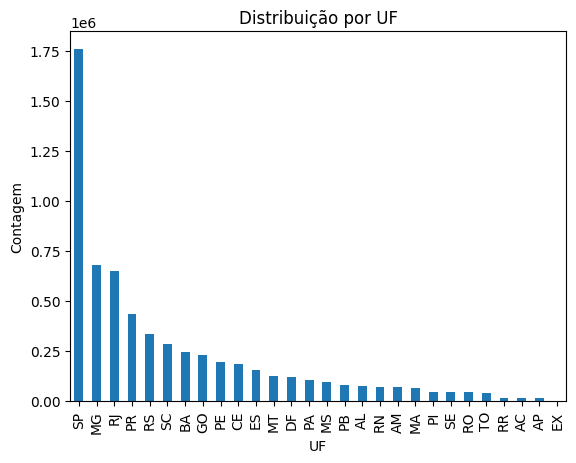

In [9]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de barras
cnpjs_2['sigla_uf'].value_counts().plot(kind='bar')
plt.title("Distribuição por UF")
plt.xlabel("UF")
plt.ylabel("Contagem")
plt.show()

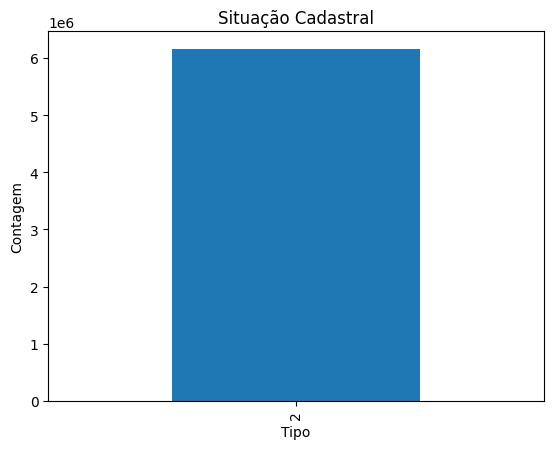

In [10]:
# Exemplo de gráfico de barras
cnpjs_2['situacao_cadastral'].value_counts().plot(kind='bar')
plt.title("Situação Cadastral")
plt.xlabel("Tipo")
plt.ylabel("Contagem")
plt.show()

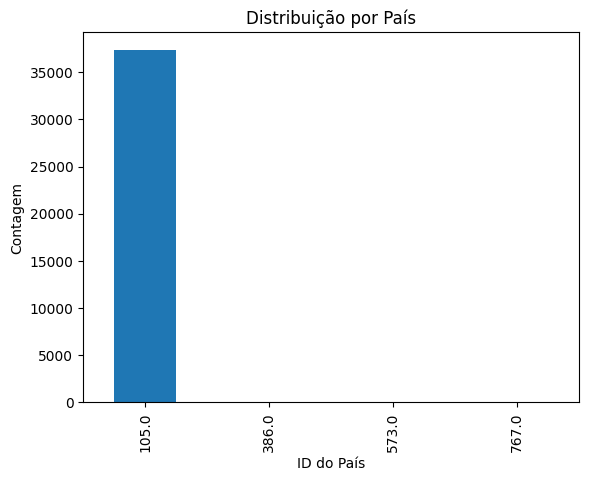

In [11]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de barras
cnpjs_2['id_pais'].value_counts().plot(kind='bar')
plt.title("Distribuição por País")
plt.xlabel("ID do País")
plt.ylabel("Contagem")
plt.show()



#dicionario dos ids dos paises

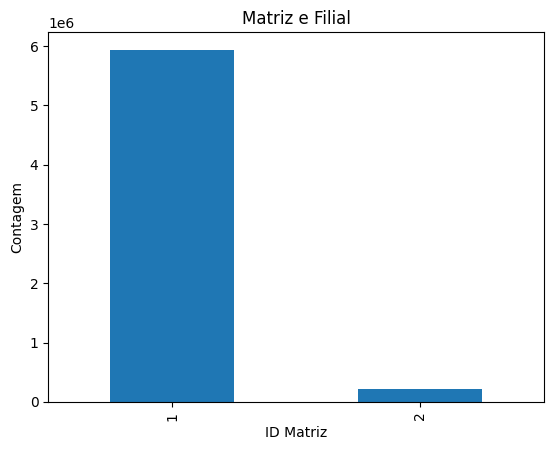

In [12]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de barras
cnpjs_2['identificador_matriz_filial'].value_counts().plot(kind='bar')
plt.title("Matriz e Filial")
plt.xlabel("ID Matriz")
plt.ylabel("Contagem")
plt.show()

In [13]:
cnpjs_2['cnae_fiscal_principal'].value_counts()

5611203    6157939
Name: cnae_fiscal_principal, dtype: int64

In [14]:
cnpjs_2['cnpj_basico'].value_counts()

42591651    22034
13574594    15606
7984267      2877
11950487     2095
22749835     1652
            ...  
49662107        1
37011859        1
32457316        1
49462300        1
37159128        1
Name: cnpj_basico, Length: 561677, dtype: int64

In [15]:
cnpjs_2['id_municipio'].value_counts()

3550308.0    474338
3304557.0    263363
5300108.0    119815
3106200.0     98009
2304400.0     87673
              ...  
2604155.0         1
2209955.0         1
2211605.0         1
2304806.0         1
4306973.0         1
Name: id_municipio, Length: 5484, dtype: int64

In [19]:
numero_de_valores_unicos = cnpjs_2['cnpj'].nunique()

print(f"O número de valores únicos na coluna 'cnpj' é: {numero_de_valores_unicos}")

O número de valores únicos na coluna 'cnpj' é: 577735
